In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.utils import np_utils

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df = pd.read_csv('data/VTOUTP16.TXT', low_memory=False)
df.head()

,hnum2,ATYPE,asour,intage,TXTZIP,sex,dstat,PPAY,CHRGS,DX1,...,BTYPE,ERFLAG,cah,vtres,OBSFLAG,AFLAG,Uniq,ADMID_QTR,DISCD_QTR,CHRGS_HCIA
0,11,3,4,13,050,2,5,1,3409.85,L600,...,131,0,1,1,0,1,3,1,1,3409.85
1,11,3,4,11,050,2,5,7,1837.65,Z86010,...,131,0,1,1,0,1,54,1,1,1837.65
2,11,3,4,12,037,2,5,1,1102.65,Z1211,...,131,0,1,3,0,1,85,1,1,1102.65
3,11,3,4,10,050,1,5,7,1102.70,Z1211,...,131,0,1,1,0,1,87,1,1,1102.70
4,11,3,4,13,051,2,5,7,1837.65,Z1211,...,131,0,1,1,0,1,93,1,1,1837.65


In [3]:
df.describe()

,hnum2,ATYPE,intage,dstat,PPAY,CHRGS,hsa,pdays,DY,RECNO,BTYPE,ERFLAG,cah,vtres,OBSFLAG,AFLAG,Uniq,ADMID_QTR,DISCD_QTR,CHRGS_HCIA
count,370633.000000,370633.000000,370633.000000,370633.000000,370633.000000,370633.000000,370633.000000,370633.000000,370633.0,3.706330e+05,370633.000000,370633.000000,370633.000000,370633.000000,370633.000000,370633.000000,3.706330e+05,370633.000000,370633.000000,370633.000000
mean,7.080063,1.754121,8.093732,4.942763,3.623676,3087.405855,15.229507,1.400739,2016.0,9.786552e+05,165.769095,0.638057,0.285954,1.374878,0.027170,0.386460,1.006005e+06,2.483929,2.483376,3087.405855
std,4.341688,0.947148,4.159334,0.625275,2.893698,4915.324061,28.115395,6.177145,0.0,5.489186e+05,153.572216,0.480563,0.451868,1.160495,0.162578,0.486939,5.640152e+05,1.110703,1.110408,4915.324061
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.0,3.000000e+00,131.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000e+00,1.000000,1.000000,0.000000
25%,5.000000,1.000000,4.000000,5.000000,1.000000,682.480000,2.000000,1.000000,2016.0,4.958420e+05,131.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.115310e+05,1.000000,1.000000,682.480000
50%,5.000000,1.000000,9.000000,5.000000,2.000000,1521.620000,7.000000,1.000000,2016.0,9.859010e+05,131.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.014498e+06,2.000000,2.000000,1521.620000
75%,9.000000,3.000000,12.000000,5.000000,6.000000,3440.180000,10.000000,1.000000,2016.0,1.450438e+06,131.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.490877e+06,3.000000,3.000000,3440.180000
max,16.000000,5.000000,14.000000,13.000000,12.000000,227311.780000,99.000000,366.000000,2016.0,1.931900e+06,857.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.985438e+06,4.000000,4.000000,227311.780000


In [4]:
# calculate distribution of pdays
unique, counts = np.unique(df.pdays, return_counts=True)

In [5]:
# print the extreme values
for i in range (0, len(counts)):
    if(counts[i] >= 200):
        if(unique[i] == 1):
            print(f"{unique[i]} day appears {counts[i]} times")
        else:
            print(f"{unique[i]} days appears {counts[i]} times")

1 day appears 363722 times
2 days appears 2167 times
3 days appears 453 times
28 days appears 632 times
29 days appears 956 times
30 days appears 764 times


In [6]:
# set weights to balance data
from sklearn.utils import class_weight
calculated_weights = class_weight.compute_class_weight("balanced", unique, df.pdays)

In [7]:
# clean up data
## replace spaces with 0
df.replace([' '], [0], inplace=True)

In [8]:
## convert ZIP codes to ints
zipcodes_dict = {}
replacement = 0
for zipcode in np.unique(df["TXTZIP"]):
    zipcodes_dict[zipcode] = replacement
    replacement += 1
print(zipcodes_dict)


df['TXTZIP'] = df['TXTZIP'].map(zipcodes_dict)

{'005': 0, '034+036': 1, '037': 2, '050': 3, '051': 4, '052': 5, '05201': 6, '053': 7, '05301': 8, '054': 9, '05401': 10, '05403': 11, '05446': 12, '05452': 13, '05468': 14, '05478': 15, '056': 16, '05602': 17, '05641': 18, '057': 19, '05701': 20, '05753': 21, '058-059': 22, '120-123': 23, '128': 24, '129': 25, '136': 26, '999': 27, 'OTH-MA': 28, 'OTH-NH': 29, 'OTH-NY': 30, 'OTH-ST': 31}


In [9]:
## replace all ICD-9 codes with ints in the DX columns
icd9codes_dict = {}
replacement = 0
for i in range (1,21):
    current_column = f'DX{i}'
    for icd9code in df[current_column]:
        if icd9code not in icd9codes_dict.keys():
            icd9codes_dict[icd9code] = replacement
            replacement += 1

for i in range (1,21):
    current_column = f'DX{i}'
    df[current_column] = df[current_column].map(icd9codes_dict)
    df[current_column] = pd.to_numeric(df[current_column])

In [10]:
## replace all ICD-9 codes with ints in the PX columns
for i in range (1,21):
    current_column = f'PX{i}'
    for icd9code in df[current_column]:
        if icd9code not in icd9codes_dict.keys():
            icd9codes_dict[icd9code] = replacement
            replacement += 1

for i in range (1,21):
    current_column = f'PX{i}'
    df[current_column] = df[current_column].map(icd9codes_dict)
    df[current_column] = pd.to_numeric(df[current_column])

In [11]:
## replace all ICD-9 codes with ints in the ECODE columns
for i in range (1,4):
    current_column = f'ECODE{i}'
    for icd9code in df[current_column]:
        if icd9code not in icd9codes_dict.keys():
            icd9codes_dict[icd9code] = replacement
            replacement += 1

for i in range (1,4):
    current_column = f'ECODE{i}'
    df[current_column] = df[current_column].map(icd9codes_dict)
    df[current_column] = pd.to_numeric(df[current_column])

In [12]:
# print first row to make sure the replacements took place
print(df.loc[0])

hnum2              11
ATYPE               3
asour               4
intage             13
TXTZIP              3
sex                 2
dstat               5
PPAY                1
CHRGS         3409.85
DX1                 0
DX2                77
DX3              2618
DX4              2618
DX5              2618
DX6              2618
DX7              2618
DX8              2618
DX9              2618
DX10             2618
DX11             2618
DX12             2618
DX13             2618
DX14             2618
DX15             2618
DX16             2618
DX17             2618
DX18             2618
DX19             2618
DX20             2618
PX1              2618
               ...   
PX12             2618
PX13             2618
PX14             2618
PX15             2618
PX16             2618
PX17             2618
PX18             2618
PX19             2618
PX20             2618
ECODE1           2618
ECODE2           2618
ECODE3           2618
hsa                12
pdays               1
ccsdx     

In [13]:
# target = number of days a patient stays in the hospital = pdays
y = df.pdays
X = df.drop("pdays", axis=1)

In [14]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
print(max(list(y_train)))

366


In [16]:
print(y_train)

219040    1
349126    1
351337    1
108743    1
158279    1
349944    1
267292    1
65658     1
96113     1
321219    1
167463    1
113447    1
349657    1
91473     1
3793      1
363338    1
149764    1
100084    1
226024    1
215663    1
91565     1
233289    1
70230     1
137304    1
367415    1
360982    1
298410    1
244009    1
233996    1
279702    1
         ..
219069    1
6648      1
30255     1
214338    1
245799    1
157698    1
307651    1
335665    1
345156    1
130256    1
227748    1
35662     1
232857    1
196719    1
164782    1
71200     1
118857    1
249903    1
65632     1
153313    1
220374    1
46203     1
129130    1
146449    1
194278    1
192476    1
17730     1
28030     1
277869    1
249342    1
Name: pdays, Length: 296506, dtype: int64


In [17]:
print(X_train.shape)

(296506, 69)


In [18]:
# setup model
## parameters
batchsize = 16
epochs = 10
inputdim = X_train.shape[1]

model = Sequential()
model.add(Dense(10, input_dim=inputdim, kernel_initializer='uniform', activation='relu'))
model.add(Dense(40, kernel_initializer='uniform', activation='relu'))
model.add(Dense(40, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation='linear'))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=epochs,validation_split=0.3, batch_size=batchsize,verbose=1, class_weight=calculated_weights)

Train on 207554 samples, validate on 88952 samples
Epoch 1/10
207554/207554 [==============================] - 32s 155us/step - loss: 49.3274 - acc: 0.6589 - val_loss: 38.1399 - val_acc: 0.9815
Epoch 2/10
207554/207554 [==============================] - 32s 154us/step - loss: 35.9973 - acc: 0.9216 - val_loss: 38.1526 - val_acc: 0.9815
Epoch 3/10
207554/207554 [==============================] - 30s 146us/step - loss: 35.9989 - acc: 0.9227 - val_loss: 38.1444 - val_acc: 0.9815
Epoch 4/10
207554/207554 [==============================] - 26s 125us/step - loss: 35.9962 - acc: 0.9134 - val_loss: 38.1406 - val_acc: 0.9815
Epoch 5/10
207554/207554 [==============================] - 36s 172us/step - loss: 35.9964 - acc: 0.9179 - val_loss: 38.1487 - val_acc: 0.0056
Epoch 6/10
207554/207554 [==============================] - 34s 162us/step - loss: 35.9958 - acc: 0.9126 - val_loss: 38.1403 - val_acc: 0.9815
Epoch 7/10
207554/207554 [==============================] - 35s 169us/step - loss: 35.9962 

In [21]:
# predict the number of days a person has to stay in the hospital
predictions = model.predict(X_test)

In [22]:
# compare prediction with real
n = 1
print("Predicted: {0} \tcertainty: {1}".format(predictions[n].argmax(axis=0), predictions[n][predictions[n].argmax(axis=0)]))
print("Real: {0}".format(list(y_test)[n]))

Predicted: 0 	certainty: 1.5008701086044312
Real: 1


In [23]:
# make list of all predictions
y_predicted = []
for i in range(0, len(predictions)):
    y_predicted.append(predictions[i].argmax(axis=0))

In [24]:
print(y_predicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

MAE =  1.426902478179341


Since this is a regression model, we didn't use a custom loss function but we did use custom weights calculated by sklearn. This has almost the same effect as a custom loss function for a non-regression model: a prediction of constantly the same value (in this case 0 instead of 1). There probably isn't much correlation between the values of the dataset and the number of days a patient has to stay in the hospital. The amount of time a person spends in a hospital probably depends on other factors than the ones mentioned in this dataset. This can be shown in the following graph:

In [32]:
# reconstruct original dataframe
df = pd.read_csv('data/VTOUTP16.TXT', low_memory=False)

In [33]:
## convert ZIP codes to ints
zipcodes_dict = {}
replacement = 0
for zipcode in np.unique(df["TXTZIP"]):
    zipcodes_dict[zipcode] = replacement
    replacement += 1

df['TXTZIP'] = df['TXTZIP'].map(zipcodes_dict)

## replace all ICD-9 codes with ints in the DX columns
icd9codes_dict = {}
replacement = 0
for i in range (1,21):
    current_column = f'DX{i}'
    for icd9code in df[current_column]:
        if icd9code not in icd9codes_dict.keys():
            icd9codes_dict[icd9code] = replacement
            replacement += 1

for i in range (1,21):
    current_column = f'DX{i}'
    df[current_column] = df[current_column].map(icd9codes_dict)
    df[current_column] = pd.to_numeric(df[current_column])

## replace all ICD-9 codes with ints in the PX columns
for i in range (1,21):
    current_column = f'PX{i}'
    for icd9code in df[current_column]:
        if icd9code not in icd9codes_dict.keys():
            icd9codes_dict[icd9code] = replacement
            replacement += 1

for i in range (1,21):
    current_column = f'PX{i}'
    df[current_column] = df[current_column].map(icd9codes_dict)
    df[current_column] = pd.to_numeric(df[current_column])

## replace all ICD-9 codes with ints in the ECODE columns
for i in range (1,4):
    current_column = f'ECODE{i}'
    for icd9code in df[current_column]:
        if icd9code not in icd9codes_dict.keys():
            icd9codes_dict[icd9code] = replacement
            replacement += 1

for i in range (1,4):
    current_column = f'ECODE{i}'
    df[current_column] = df[current_column].map(icd9codes_dict)
    df[current_column] = pd.to_numeric(df[current_column])

{'005': 0, '034+036': 1, '037': 2, '050': 3, '051': 4, '052': 5, '05201': 6, '053': 7, '05301': 8, '054': 9, '05401': 10, '05403': 11, '05446': 12, '05452': 13, '05468': 14, '05478': 15, '056': 16, '05602': 17, '05641': 18, '057': 19, '05701': 20, '05753': 21, '058-059': 22, '120-123': 23, '128': 24, '129': 25, '136': 26, '999': 27, 'OTH-MA': 28, 'OTH-NH': 29, 'OTH-NY': 30, 'OTH-ST': 31}


In [35]:
df.drop('PX11', axis=1, inplace=True)
df.drop('PX12', axis=1, inplace=True)
df.drop('PX13', axis=1, inplace=True)
df.drop('PX14', axis=1, inplace=True)
df.drop('PX15', axis=1, inplace=True)
df.drop('PX16', axis=1, inplace=True)
df.drop('PX17', axis=1, inplace=True)
df.drop('PX18', axis=1, inplace=True)
df.drop('PX19', axis=1, inplace=True)
df.drop('PX20', axis=1, inplace=True)
df.drop('DY', axis=1, inplace=True)

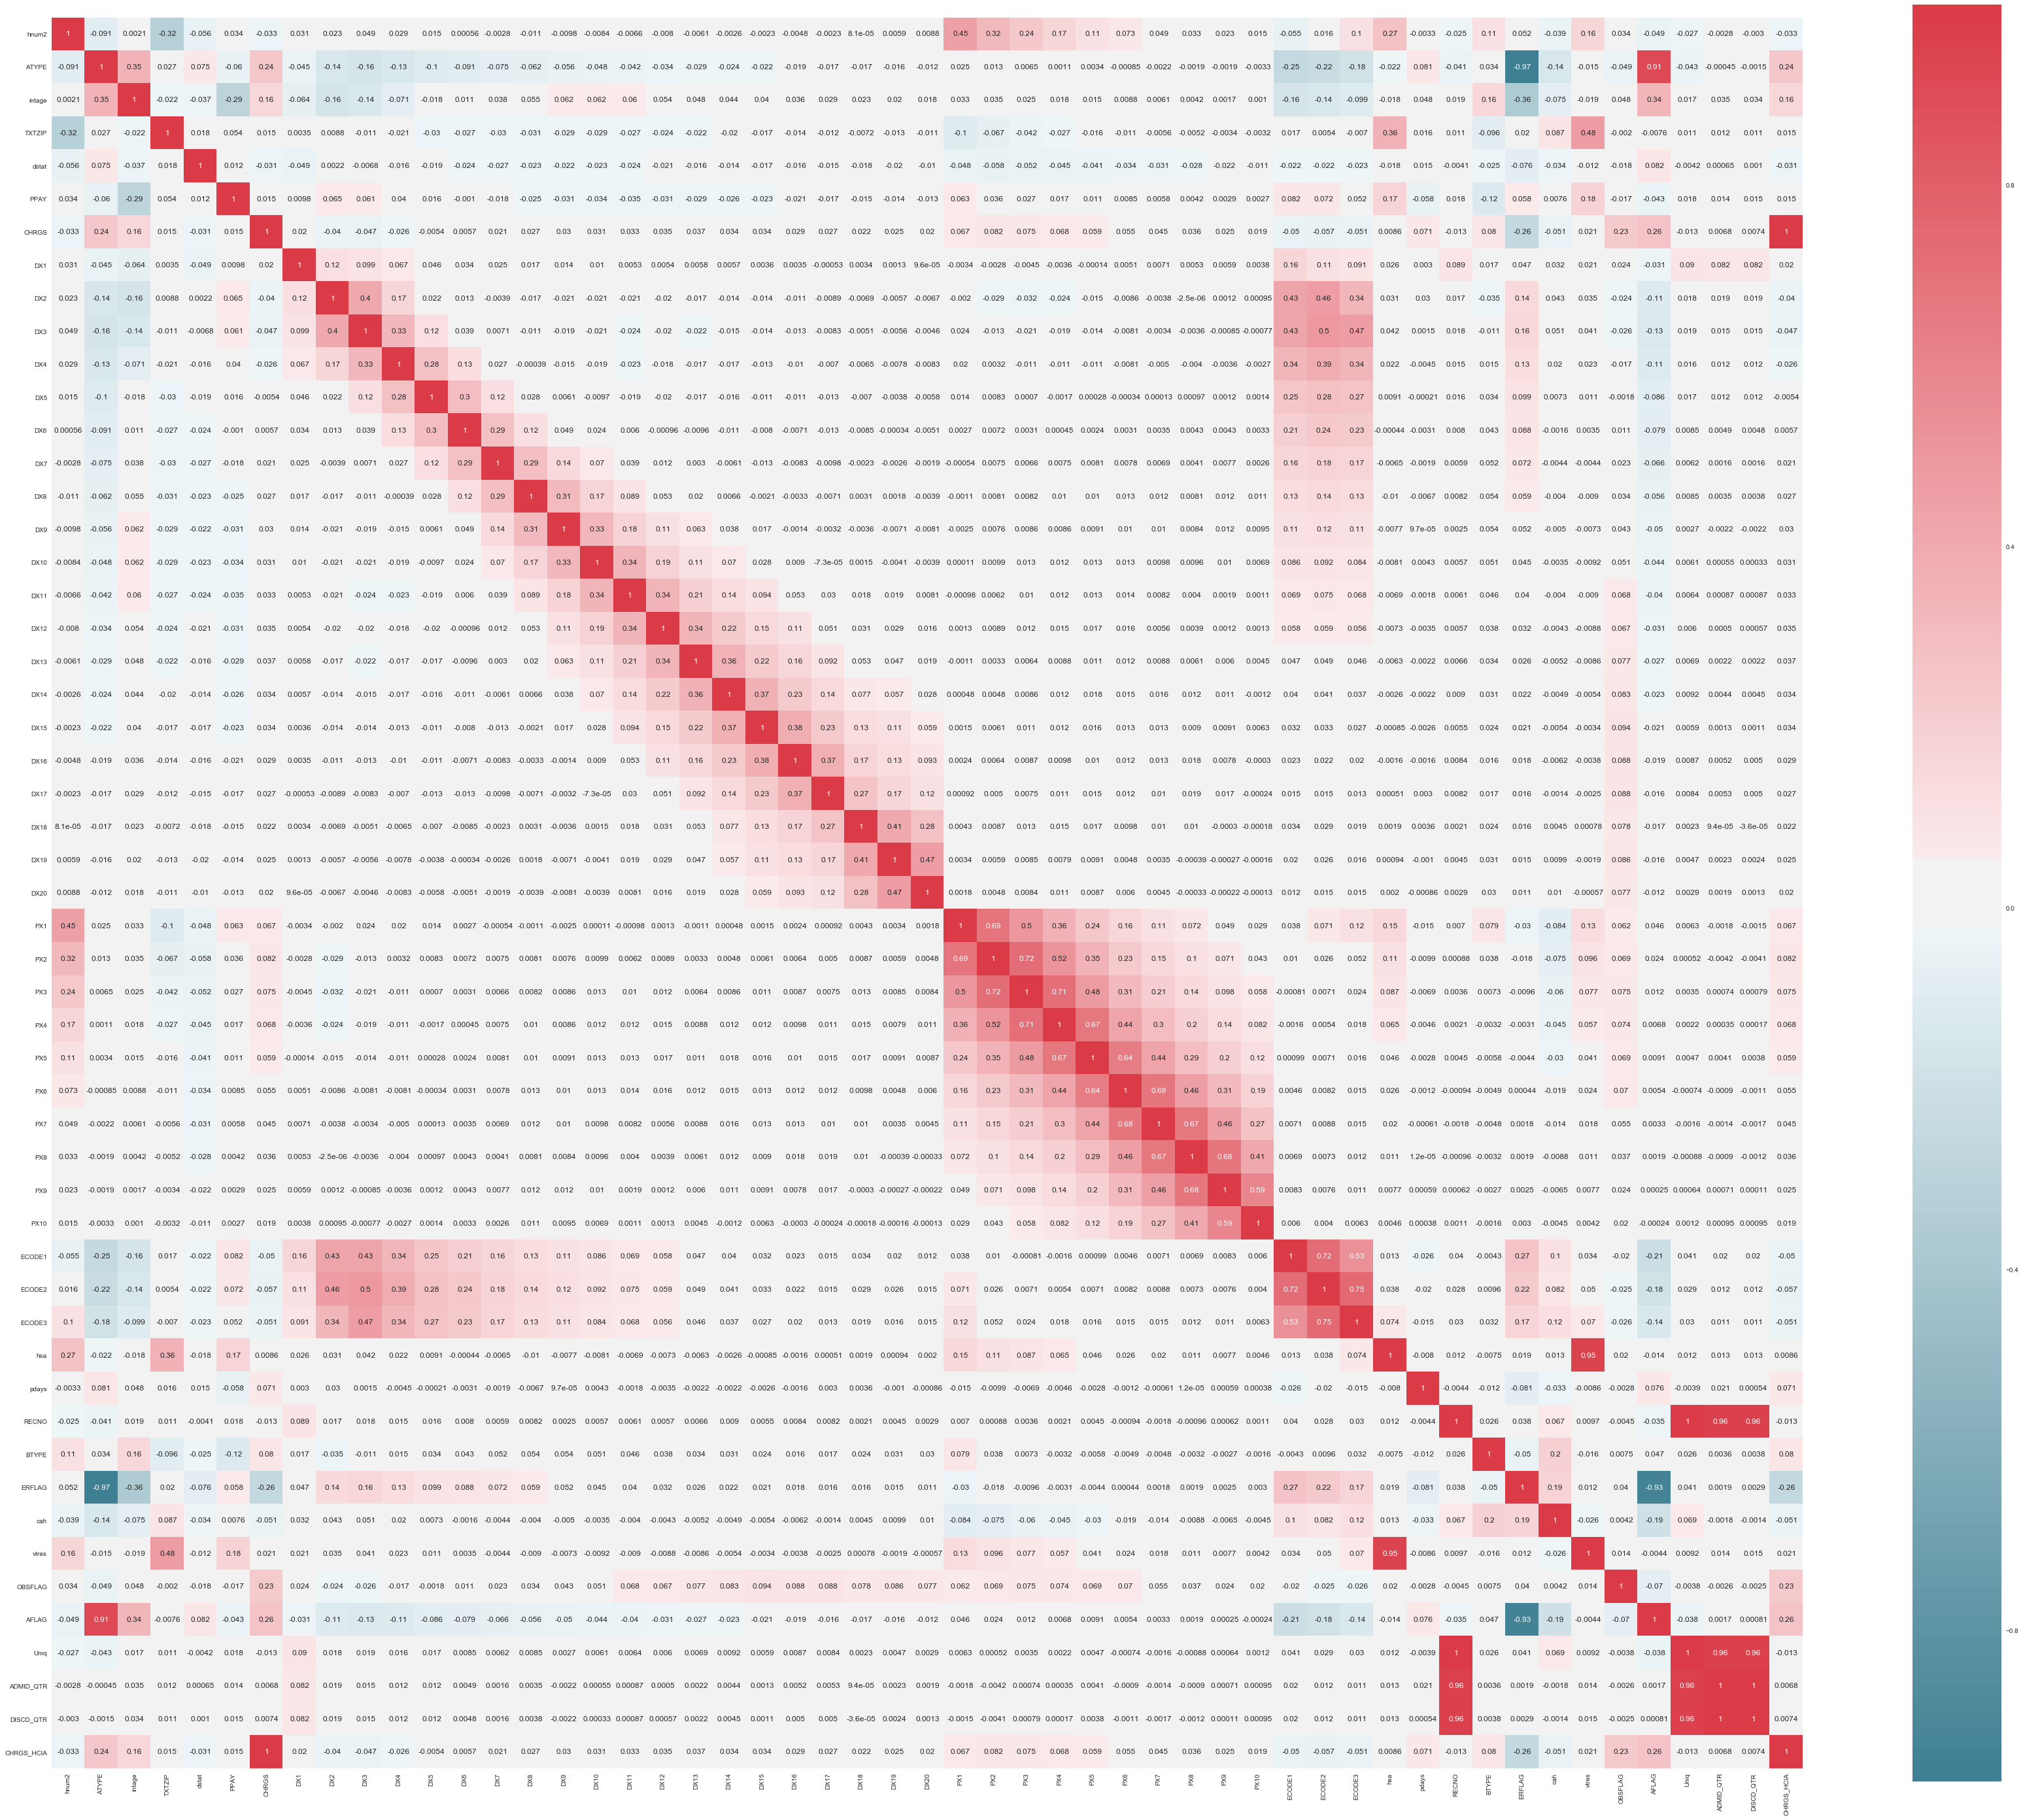

In [36]:
# show heatmap
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

f, ax = plt.subplots(figsize=(60, 50))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)